In [2]:
import pandas as pd

# Importa cada CSV separadamente
leitos_2023 = pd.read_csv("Leitos_2023.csv", encoding="latin-1")
leitos_2024 = pd.read_csv("Leitos_2024.csv", encoding="latin-1")
leitos_2025 = pd.read_csv("Leitos_2025.csv", sep=";", encoding="latin-1")

# Adiciona uma coluna para indicar o ano (se o CSV não tiver)
leitos_2023["Ano"] = 2023
leitos_2024["Ano"] = 2024
leitos_2025["Ano"] = 2025

# Junta tudo em um único DataFrame
leitos = pd.concat([leitos_2023, leitos_2024, leitos_2025], ignore_index=True)

# Mostra o resultado
display(leitos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219870 entries, 0 to 219869
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COMP                    219870 non-null  int64  
 1   REGIAO                  219870 non-null  object 
 2   UF                      219870 non-null  object 
 3   MUNICIPIO               219870 non-null  object 
 4   MOTIVO_DESABILITACAO    0 non-null       float64
 5   CNES                    219870 non-null  int64  
 6   NOME_ESTABELECIMENTO    219868 non-null  object 
 7   RAZAO_SOCIAL            219870 non-null  object 
 8   TP_GESTAO               219870 non-null  object 
 9   CO_TIPO_UNIDADE         219870 non-null  int64  
 10  DS_TIPO_UNIDADE         219870 non-null  object 
 11  NATUREZA_JURIDICA       219870 non-null  int64  
 12  DESC_NATUREZA_JURIDICA  219870 non-null  object 
 13  NO_LOGRADOURO           219870 non-null  object 
 14  NU_ENDERECO         

None

In [3]:
#Separar ano e mês a partir da coluna COMP
leitos["Ano"] = leitos["COMP"].astype(str).str[:4].astype(int)
leitos["Mes"] = leitos["COMP"].astype(str).str[4:6].astype(int)

In [13]:
#Selecionar só as colunas relevantes para análise
#Exemplo: REGIAO, UF, MUNICIPIO, Ano, Mes, e as colunas de leitos (UTI_ADULTO_EXIST, UTI_PEDIATRICO_EXIST

resumo = leitos.groupby(["Ano", "REGIAO"])[
    ["LEITOS_EXISTENTES","LEITOS_SUS","UTI_ADULTO_EXIST", "UTI_PEDIATRICO_EXIST", "UTI_NEONATAL_EXIST", "UTI_QUEIMADO_EXIST", "UTI_CORONARIANA_EXIST"]
].sum().reset_index()

display(resumo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Ano                    15 non-null     int64 
 1   REGIAO                 15 non-null     object
 2   LEITOS_EXISTENTES      15 non-null     int64 
 3   LEITOS_SUS             15 non-null     int64 
 4   UTI_ADULTO_EXIST       15 non-null     int64 
 5   UTI_PEDIATRICO_EXIST   15 non-null     int64 
 6   UTI_NEONATAL_EXIST     15 non-null     int64 
 7   UTI_QUEIMADO_EXIST     15 non-null     int64 
 8   UTI_CORONARIANA_EXIST  15 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.2+ KB


None

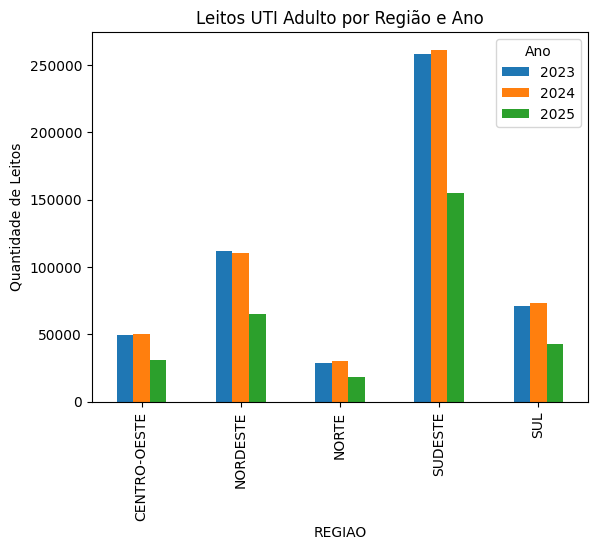

In [14]:
import matplotlib.pyplot as plt

resumo.pivot(index="REGIAO", columns="Ano", values="UTI_ADULTO_EXIST").plot(kind="bar")
plt.title("Leitos UTI Adulto por Região e Ano")
plt.ylabel("Quantidade de Leitos")
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista das colunas de leitos EXIST e SUS
col_exist = [c for c in leitos.columns if c.endswith("_EXIST")]
col_sus   = [c for c in leitos.columns if c.endswith("_SUS")]

# Cria colunas auxiliares: total de leitos existentes e SUS
leitos["Leitos_Exist"] = leitos[col_exist].sum(axis=1)
leitos["Leitos_SUS"]   = leitos[col_sus].sum(axis=1)

# Agrupa por Ano e Região
resumo = leitos.groupby(["Ano", "REGIAO"])[["Leitos_Exist", "Leitos_SUS"]].sum().reset_index()

print(resumo.head())


    Ano        REGIAO  Leitos_Exist  Leitos_SUS
0  2023  CENTRO-OESTE        140454      407286
1  2023      NORDESTE        308048     1425914
2  2023         NORTE         86644      405752
3  2023       SUDESTE        743434     1835271
4  2023           SUL        197684      786360


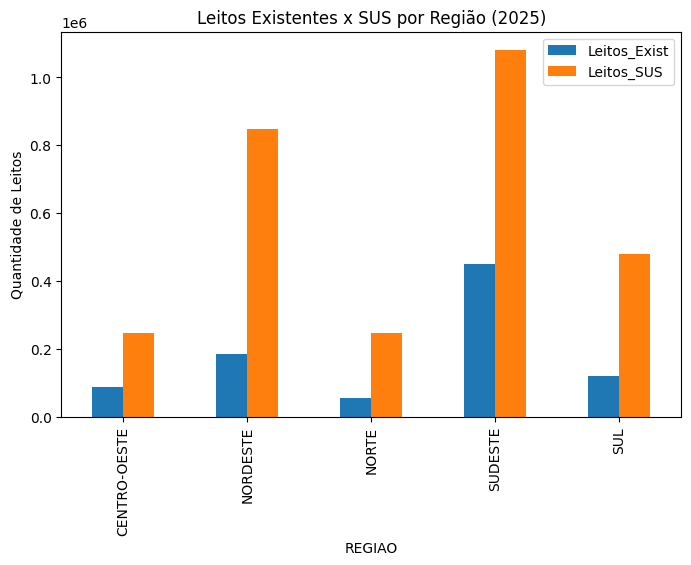

In [16]:
ano_escolhido = 2025
dados = resumo[resumo["Ano"] == ano_escolhido]

dados.plot(x="REGIAO", kind="bar", stacked=False, 
           y=["Leitos_Exist", "Leitos_SUS"], figsize=(8,5))
plt.title(f"Leitos Existentes x SUS por Região ({ano_escolhido})")
plt.ylabel("Quantidade de Leitos")
plt.show()


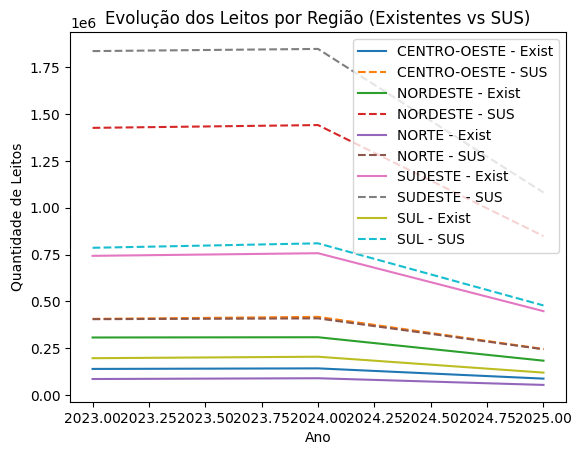

In [17]:
for regiao in resumo["REGIAO"].unique():
    df_reg = resumo[resumo["REGIAO"] == regiao]
    plt.plot(df_reg["Ano"], df_reg["Leitos_Exist"], label=f"{regiao} - Exist")
    plt.plot(df_reg["Ano"], df_reg["Leitos_SUS"], "--", label=f"{regiao} - SUS")

plt.title("Evolução dos Leitos por Região (Existentes vs SUS)")
plt.ylabel("Quantidade de Leitos")
plt.xlabel("Ano")
plt.legend()
plt.show()
